160 samples


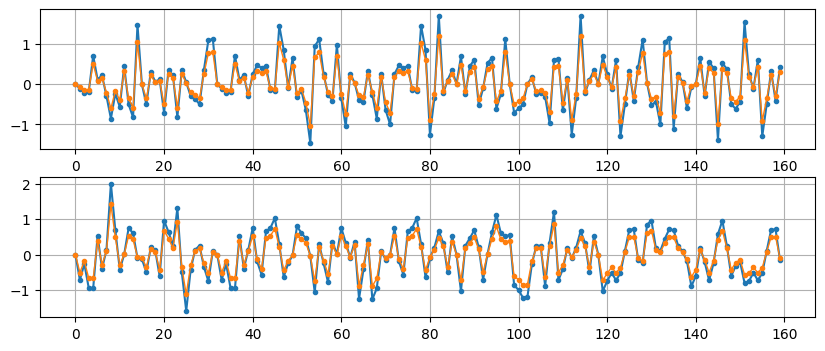

1.4142377691855672

In [92]:
import numpy as np
from numpy.fft import fft, fftshift, ifft, ifftshift, fftfreq
import matplotlib.pyplot as plt
data = np.load('./signal.npy')
th = np.load('./signal_th.npy')
print(f"{data.size} samples")

plt.figure(figsize=(10,4))
plt.subplot(211)
plt.plot(th.real, '.-', linewidth=1.5)
plt.plot(data.real, '.-', linewidth=1)
plt.grid()
plt.subplot(212)
plt.plot(th.imag, '.-', linewidth=1.5)
plt.plot(data.imag, '.-', linewidth=1)
plt.grid()
plt.show()

np.sum(np.abs(th)) / np.sum(np.abs(data))

(16, 8) (16, 8)


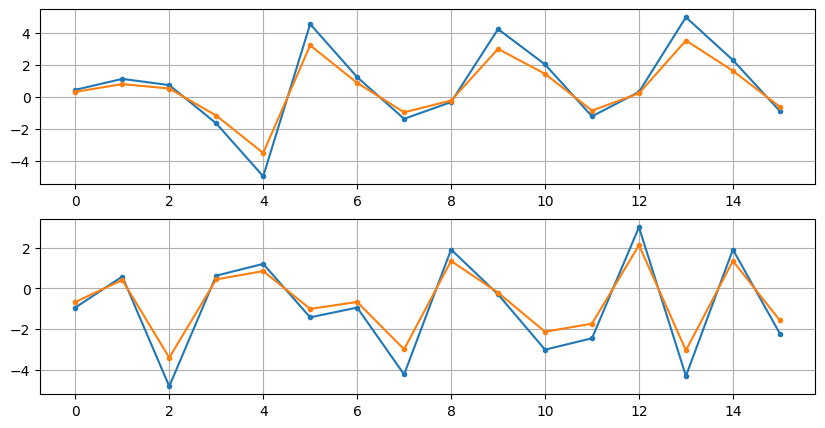

In [93]:
data_split = data.reshape(20,-1,order='F')
th_split = th.reshape(20,-1,order='F')
data_no_cp = data_split[4:,:]
th_no_cp = th_split[4:,:]

print(data_no_cp.shape, th_no_cp.shape)

n = 0
data_fft = fftshift(fft(data_no_cp, axis=0), axes=0)
th_fft = fftshift(fft(th_no_cp, axis=0), axes=0)

fr = fftfreq(data_fft.shape[0])

plt.figure(figsize=(10,5))
plt.subplot(211)
plt.plot(th_fft[:,n].real, '.-')
plt.plot(data_fft[:,n].real, '.-')
plt.grid()
plt.subplot(212)
plt.plot(th_fft[:,n].imag, '.-')
plt.plot(data_fft[:,n].imag, '.-')
plt.grid()

In [94]:
th_fft_flat = th_fft.reshape(-1,order='F')
data_fft_flat = data_fft.reshape(-1,order='F')

threshold = 0.1
pilots_locations_th = np.logical_and(np.abs(th_fft_flat.real) > threshold, np.abs(th_fft_flat.imag) < threshold)
pilots_values_th = (th_fft_flat[pilots_locations_th] > 0) * 1

pilots_locations = np.logical_and(np.abs(data_fft_flat.real) > threshold, np.abs(data_fft_flat.imag) < threshold)
pilots_values = (data_fft_flat[pilots_locations] > 0) * 1

print(pilots_values_th)
print(pilots_values)

[1 1 1 1 1]
[1 1 0 1 1 1]
